# Visualisations of the Mandelbrot Set

In [1]:
# Install a little extension to make our code prettier
!pip install nb_black

%matplotlib inline
%load_ext lab_black

In [2]:
import math

from ceres_workshop.fractals.fractals import (
    Mandelbrot,
    FEIGENBAUM_DELTA,
    FEIGENBAUM_POINT,
)
from ceres_workshop.fractals.utils import make_gif, get_quadratic_map_roots

/home/joe/.miniconda3/envs/ceres/lib/python3.9/site-packages/ceres_workshop/fractals/fractals.py:29: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## Static plots

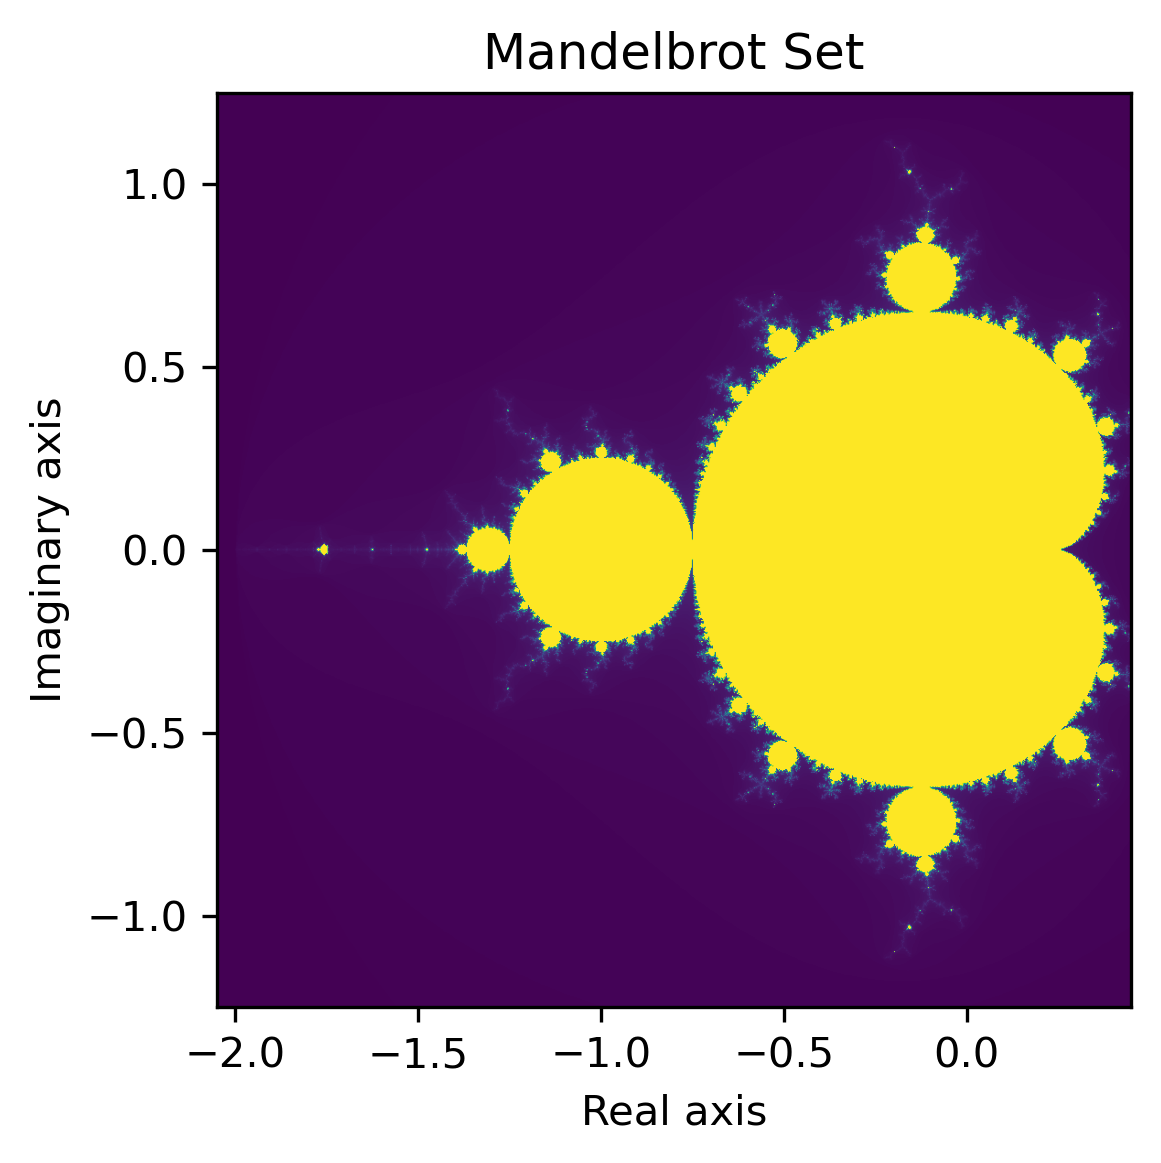

In [15]:
centre = complex(-0.8, 0)
extent = 2.5
resolution = 1000
cmap = "viridis"

fig = Mandelbrot(centre, extent, resolution).get_figure(cmap)
fig.set_dpi(300)  # resize image "dots per inch" so we can see more clearly

## Exploring roots of the quadric map

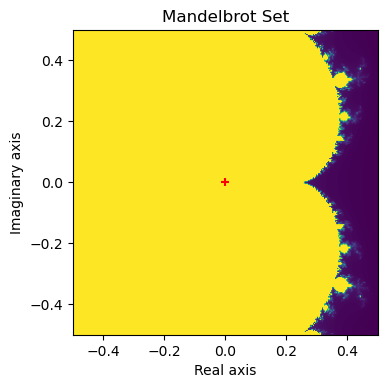

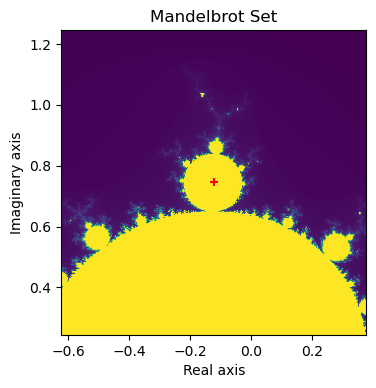

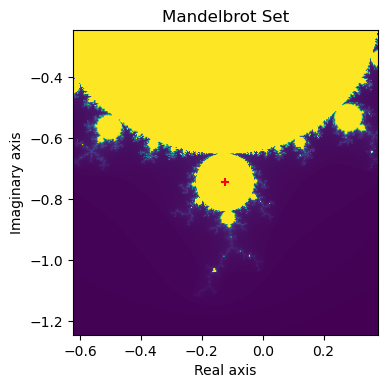

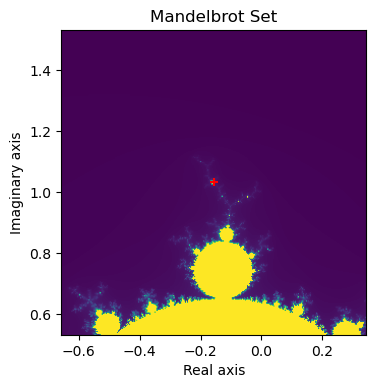

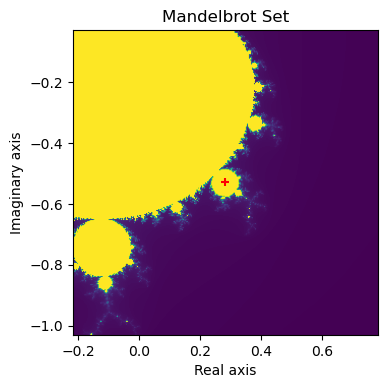

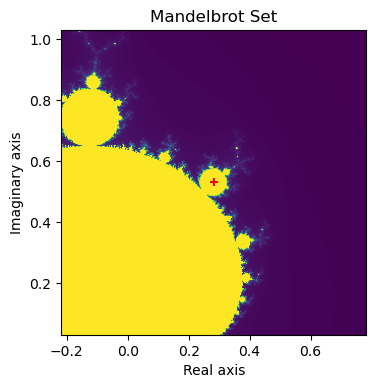

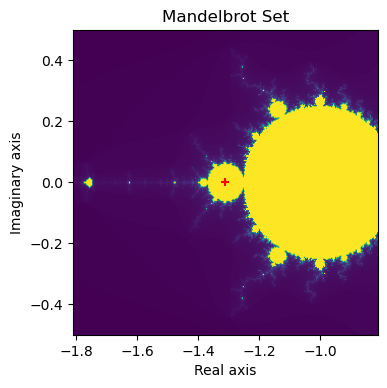

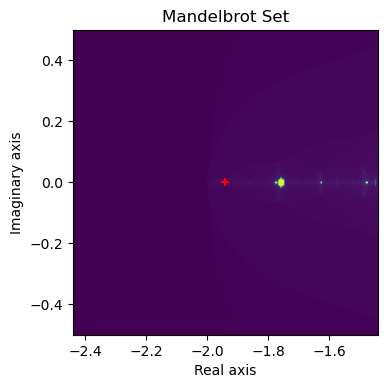

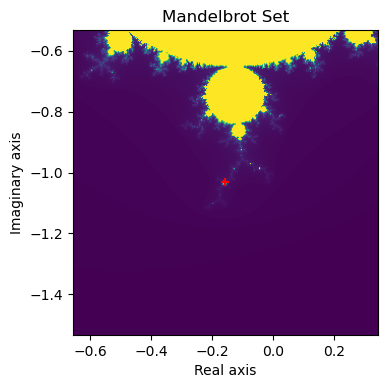

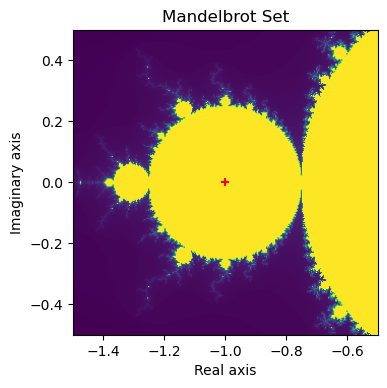

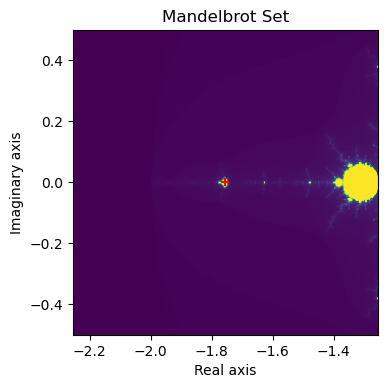

In [12]:
roots = set(
    get_quadratic_map_roots(2) + get_quadratic_map_roots(3) + get_quadratic_map_roots(4)
)
for root in roots:
    fig = Mandelbrot(root, 1, 300).get_figure()
    fig.gca().scatter([root.real], [root.imag], color="r", marker="+")
    fig.set_dpi(100)

## Making an animation

In [11]:
centre = FEIGENBAUM_POINT
resolution = 500
n_fold = 3 
n_frames = 100

factor = pow(FEIGENBAUM_DELTA, n_fold / n_frames)

frames = []
extent = 1.5
for i in range(n_frames):
    extent /= factor
    frames.append(Mandelbrot(complex(centre), extent, resolution).get_image())

make_gif(frames, "mandelbrot.gif", 50)

![](mandelbrot.gif)